In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/kc_house_data.csv")
df.head() # Display first few rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 데이터 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

'''
### kc_house_data.csv 컬럼 설명

| Feature         | Description                                             |
|-----------------|---------------------------------------------------------|
| id              | 각 주택의 고유 ID                                       |
| date            | 주택 판매 날짜                                          |
| price           | 주택 판매 가격 (Target Variable)                        |
| bedrooms        | 침실 수                                                 |
| bathrooms       | 화장실 수 (0.5는 샤워실 없는 화장실)                   |
| sqft_living     | 주거 공간의 평방 피트                                   |
| sqft_lot        | 부지의 평방 피트                                        |
| floors          | 층 수                                                   |
| waterfront      | 해안가 전망 여부 (1=Yes, 0=No)                          |
| view            | 전망 등급 (0-4)                                         |
| condition       | 주택 상태 등급 (1-5)                                    |
| grade           | King County 등급 시스템 기준 건축 및 디자인 등급 (1-13) |
| sqft_above      | 지상층 주거 공간의 평방 피트                            |
| sqft_basement   | 지하층 공간의 평방 피트                                 |
| yr_built        | 건축 연도                                               |
| yr_renovated    | 마지막 리모델링 연도 (0은 리모델링 없음)               |
| zipcode         | 우편번호                                                |
| lat             | 위도                                                    |
| long            | 경도                                                    |
| sqft_living15   | 2015년 기준 가장 가까운 15개 이웃 주택의 평균 주거 공간 |
| sqft_lot15      | 2015년 기준 가장 가까운 15개 이웃 주택의 평균 부지 크기 |
'''

In [4]:
# 불필요하거나 직접 사용하기 어려운 컬럼 제거 (id, date, zipcode)
# date는 feature engineering을 통해 년/월 등으로 분리하여 사용할 수 있지만 여기서는 제거
# zipcode는 범주형으로 처리하기에는 unique 값이 많아 여기서는 제거 (추후 개선 가능)
df = df.drop(['id', 'date', 'zipcode'], axis=1)

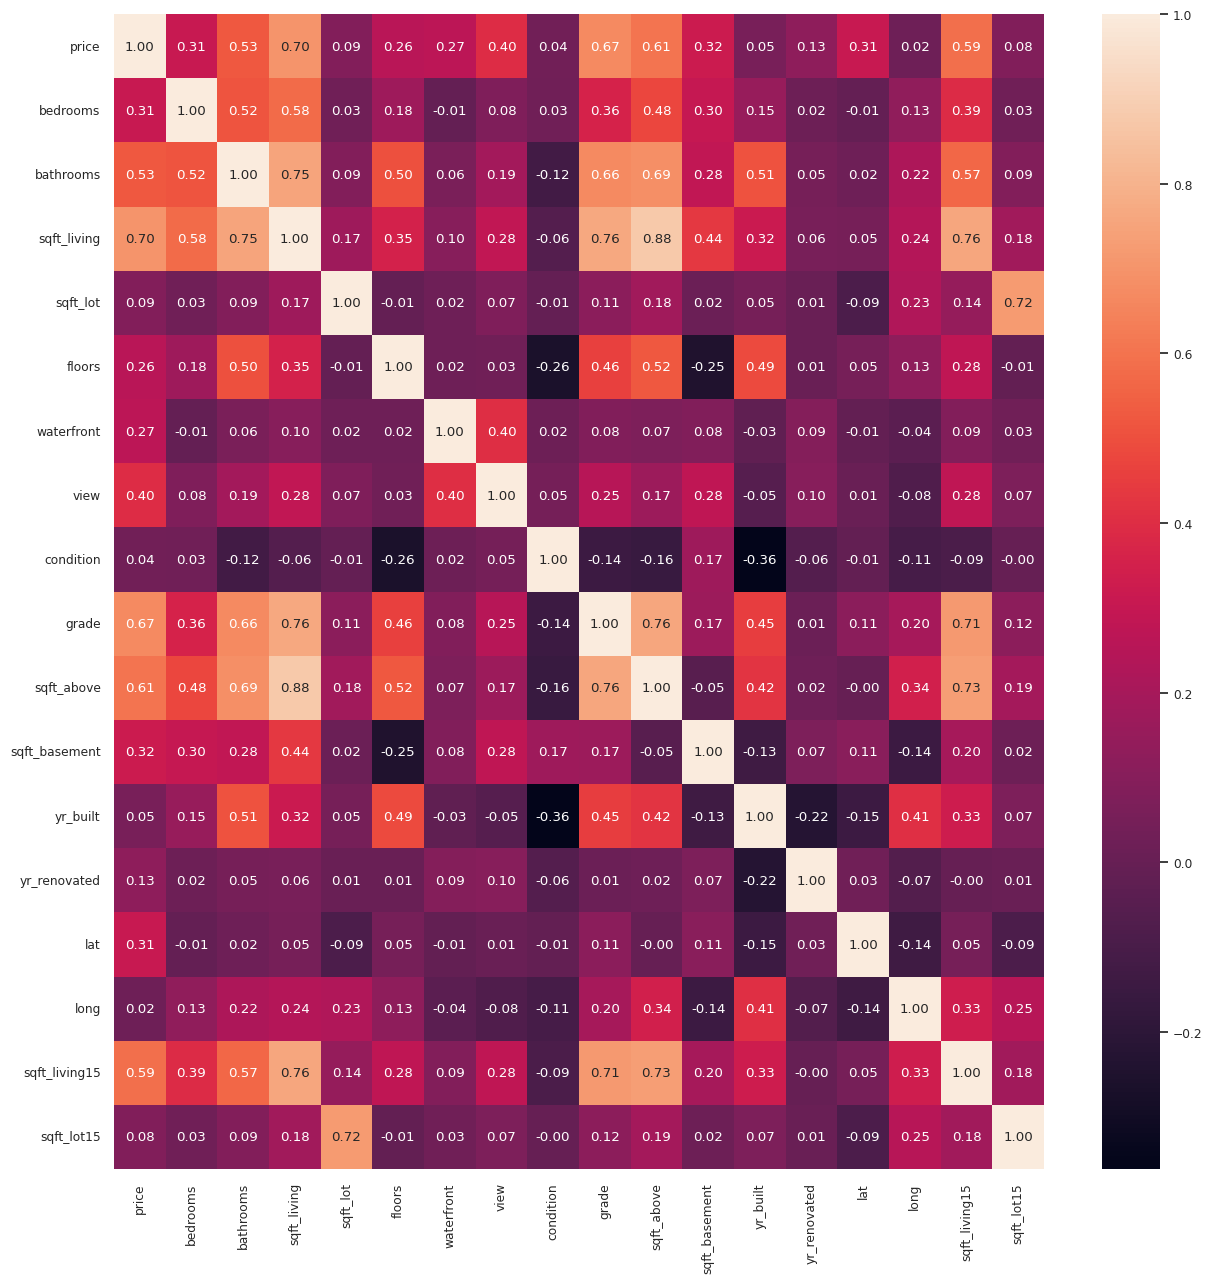

In [5]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(15,15)) # Figure size adjusted for more features
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True, fmt='.2f') # Added format and cbar
plt.show()

# PRICE와 높은 상관관계를 보이는 변수 확인 (예: sqft_living, grade, sqft_above, sqft_living15, bathrooms 등)

In [6]:
from sklearn.metrics import mean_squared_error # , r2_score # r2_score는 사용되지 않음

In [7]:
# Feature (X)와 Target (y) 분리
X = df.drop('price',axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [8]:
y = df['price'] # 원본 가격 데이터
y_log = np.log1p(y) # 로그 변환된 가격 데이터
print("Original Price (head):\n", y.head())
print("\nLog Transformed Price (head):\n", y_log.head())

Original Price (head):
 0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

Log Transformed Price (head):
 0    12.309987
1    13.195616
2    12.100718
3    13.311331
4    13.142168
Name: price, dtype: float64


# 딥러닝 입력을 위해 Numpy 배열로 변환

In [9]:
X = X.values
y_log = y_log.values # 로그 변환된 y를 numpy 배열로 변환

In [10]:
# X 확인
print(X[:5]) # 첫 5개 행 출력
print(X.shape)

[[ 3.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
   0.00000e+00  1.95500e+03  0.00000e+00  4.75112e+01 -1.22257e+02
   1.34000e+03  5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03  7.24200e+03  2.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  2.17000e+03
   4.00000e+02  1.95100e+03  1.99100e+03  4.77210e+01 -1.22319e+02
   1.69000e+03  7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02  1.00000e+04  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  6.00000e+00  7.70000e+02
   0.00000e+00  1.93300e+03  0.00000e+00  4.77379e+01 -1.22233e+02
   2.72000e+03  8.06200e+03]
 [ 4.00000e+00  3.00000e+00  1.96000e+03  5.00000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  5.00000e+00  7.00000e+00  1.05000e+03
   9.10000e+02  1.96500e+03  0.00000e+00  4.75208e+01 -1.22393e+02
   1.36000e+03  5.00000e+03]
 [ 3.00000e+00  2.00000e+00  1.68000e+03  8.08000e+03  1.00000e+00
   0.00000e+0

In [11]:
# y 확인
print(y[:5]) # 첫 5개 행 출력
print(y.shape)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64
(21613,)


In [12]:
# 데이터 스케일링 (회귀에서는 중요할 수 있음)
# 특성(X)들의 범위가 크게 다르면 학습에 영향을 줄 수 있으므로 표준화(Standardization) 적용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할 (스케일링된 X 사용)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=0)

In [13]:
# 분할된 데이터 shape 확인
print(X_train.shape, y_train_log.shape, X_test.shape, y_test_log.shape)

(17290, 17) (17290,) (4323, 17) (4323,)


In [14]:
# 모델 정의

from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import SGD,Adam # Adam 옵티마이저 사용 예정

# 입력 특성 수 확인
n_features = X_train.shape[1]

model = Sequential()

# 입력층: input_shape는 특성의 개수(n_features)로 설정
# 첫번째 Dense 층의 유닛 수는 자유롭게 설정 가능 (예: 32 또는 n_features)
model.add(Dense(15, input_shape=(n_features,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # 회귀 문제이므로 출력 유닛은 1개, 활성화 함수 없음 (linear)

# 모델 컴파일: 회귀 문제이므로 loss는 mse 사용, optimizer는 Adam 사용 (rmsprop도 가능)
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse']) # MAE도 함께 확인

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,651 (6.45 KB)

 Trainable params: 1,651 (6.45 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 모델 학습
# Epoch 수를 늘리고, EarlyStopping 콜백을 사용하여 과적합 방지 및 최적 시점 찾기
from keras.callbacks import EarlyStopping

N_EPOCHS = 50
BATCH_SIZE = 32

# EarlyStopping 콜백 설정: validation loss가 10 epoch 동안 개선되지 않으면 학습 중단
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x=X_train, y=y_train_log,  # 로그 변환된 y_train 사용
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test_log), # 로그 변환된 y_test 사용
                    callbacks=[early_stopping],
                    verbose=1)

# 테스트 데이터로 예측 (EarlyStopping이 최적 가중치를 복원했으므로 별도 예측 필요 없음)
# y_pred = model.predict(X_test)

Epoch 1/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 52.3470 - mae: 5.3713 - mse: 52.3470 - val_loss: 1.1479 - val_mae: 0.7716 - val_mse: 1.1479
Epoch 2/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9480 - mae: 0.6524 - mse: 0.9480 - val_loss: 0.3037 - val_mae: 0.3835 - val_mse: 0.3037
Epoch 3/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3165 - mae: 0.3699 - mse: 0.3165 - val_loss: 0.1479 - val_mae: 0.2807 - val_mse: 0.1479
Epoch 4/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1520 - mae: 0.2747 - mse: 0.1520 - val_loss: 0.1058 - val_mae: 0.2465 - val_mse: 0.1058
Epoch 5/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1087 - mae: 0.2386 - mse: 0.1087 - val_loss: 0.1045 - val_mae: 0.2520 - val_mse: 0.1045
Epoch 6/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0920 - mae: 0.2286 - mse: 0.0920 - val_loss: 0.0818 - val_mae: 0.2182 - val_mse: 0.0818
Epoch 7/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0793 - mae: 0.2126 - mse: 0.0793 - v

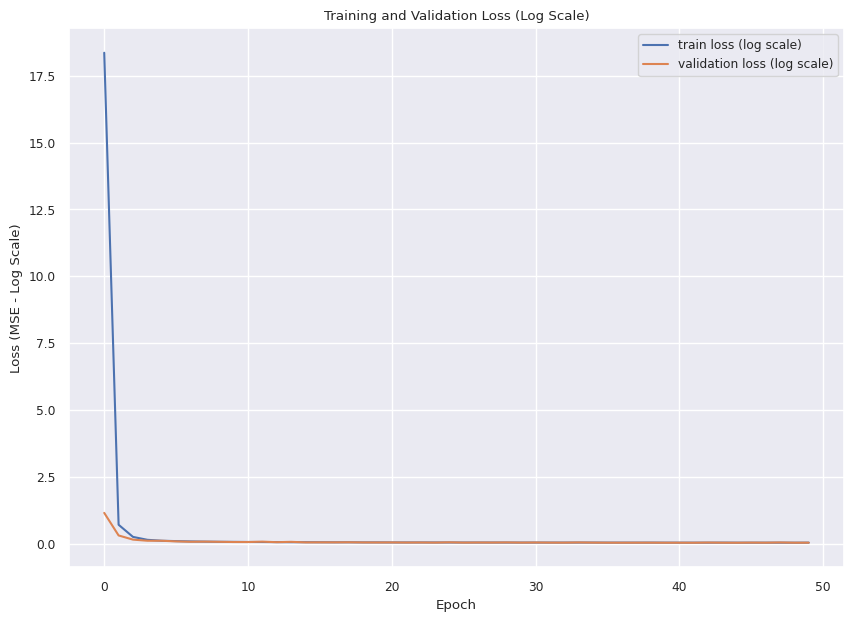

In [16]:
# loss 및 val_loss 시각화
import matplotlib.pyplot as plt

# history 객체에 저장된 epoch 수 확인 (EarlyStopping으로 인해 N_EPOCHS보다 작을 수 있음)
epochs_ran = len(history.history['loss'])
plt.figure(figsize=(10,7))
plt.plot(range(epochs_ran), history.history['loss'], label='train loss (log scale)')
plt.plot(range(epochs_ran), history.history['val_loss'], label='validation loss (log scale)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE - Log Scale)')
plt.legend()
plt.title('Training and Validation Loss (Log Scale)')
plt.show()

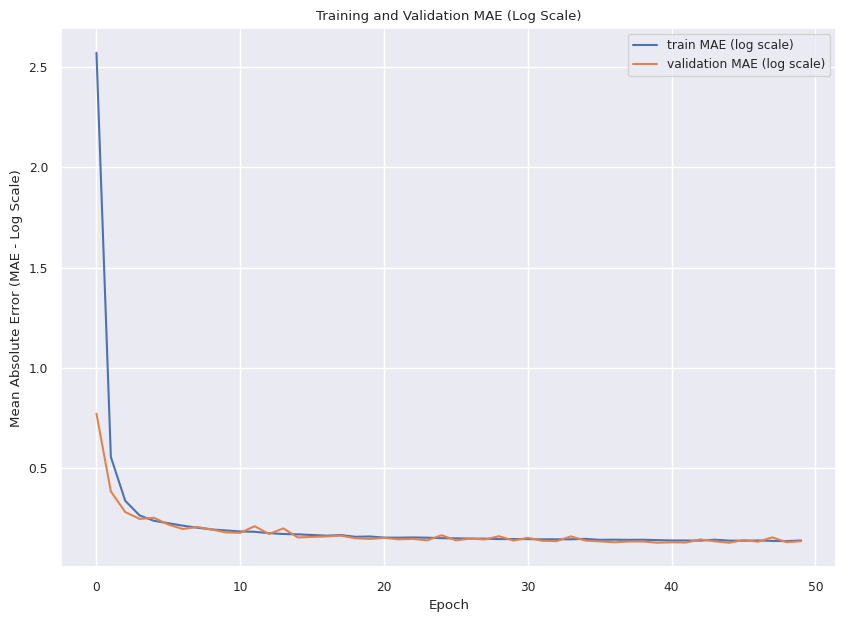

In [17]:
# MAE 및 val_MAE 시각화
plt.figure(figsize=(10,7))
plt.plot(range(epochs_ran), history.history['mae'], label='train MAE (log scale)')
plt.plot(range(epochs_ran), history.history['val_mae'], label='validation MAE (log scale)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE - Log Scale)')
plt.legend()
plt.title('Training and Validation MAE (Log Scale)')
plt.show()

In [18]:
# 모델 평가 (테스트 데이터셋)
# 1. 테스트 데이터로 로그 스케일 예측
y_pred_log = model.predict(X_test)

# 2. 예측값과 실제값(y_test_log)을 원래 스케일로 변환
y_test_orig = np.expm1(y_test_log)
y_pred_orig = np.expm1(y_pred_log)

# 3. 원래 스케일에서 오차 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)

print(f"Test MSE (Original Scale): {mse_orig:.2f}")
print(f"Test MAE (Original Scale): {mae_orig:.2f}")
print(f"Test RMSE (Original Scale): {rmse_orig:.2f}")

# 참고: 모델이 학습 중 사용한 로그 스케일의 평가 결과도 확인 가능
loss, mae_log, mse_log = model.evaluate(X_test, y_test_log, verbose=0)
print(f"\nTest MSE (Log Scale): {mse_log:.4f}") # 로그 스케일 MSE
print(f"Test MAE (Log Scale): {mae_log:.4f}") # 로그 스케일 MAE

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE (Original Scale): 14488905659.39
Test MAE (Original Scale): 69081.44
Test RMSE (Original Scale): 120369.87

Test MSE (Log Scale): 0.0306
Test MAE (Log Scale): 0.1275


## 예측값과 실제값 비교 (샘플)

In [19]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 예측값과 실제값을 비교하기 쉽게 DataFrame 생성 (처음 10개 샘플)
# y_test_orig와 y_pred_orig 사용
comparison_df = pd.DataFrame({'Actual Price': y_test_orig.flatten(), 'Predicted Price': y_pred_orig.flatten()})
print(comparison_df.head(10))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Actual Price  Predicted Price
0      297000.0     3.143667e+05
1     1578000.0     1.785346e+06
2      562100.0     5.562889e+05
3      631500.0     6.291233e+05
4      780000.0     6.824057e+05
5      485000.0     4.356714e+05
6      340000.0     3.568519e+05
7      335606.0     3.623630e+05
8      425000.0     4.601998e+05
9      490000.0     1.740284e+06


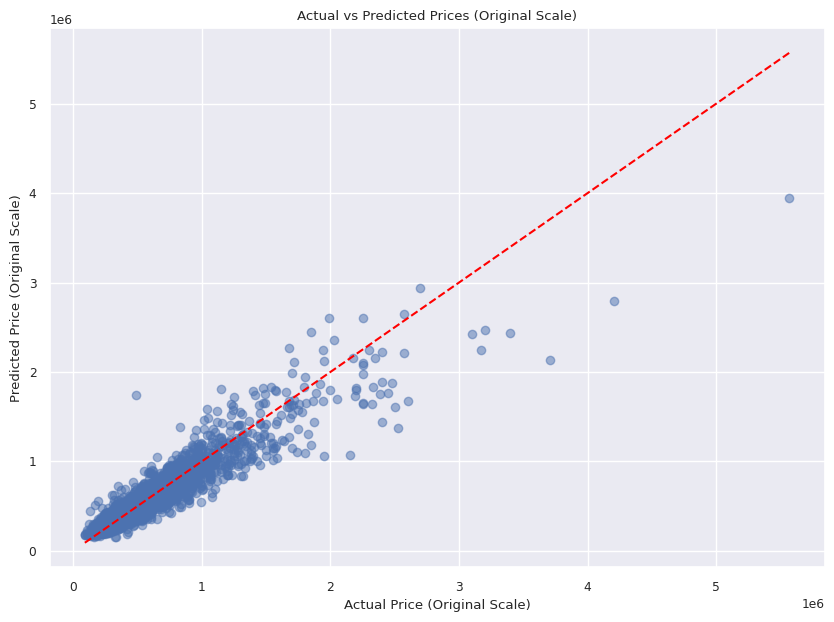

In [20]:
# 예측값 vs 실제값 산점도 (y_test_orig, y_pred_orig 사용)
plt.figure(figsize=(10, 7))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5) # 원래 스케일 값 사용
plt.xlabel('Actual Price (Original Scale)')
plt.ylabel('Predicted Price (Original Scale)')
plt.title('Actual vs Predicted Prices (Original Scale)')
# 이상적인 예측선 (y=x) 추가
max_price = max(y_test_orig.max(), y_pred_orig.max())
min_price = min(y_test_orig.min(), y_pred_orig.min())
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--')
# 스케일을 로그로 변경하여 저가 주택의 분포를 더 잘 볼 수도 있습니다 (선택 사항)
# plt.xscale('log')
# plt.yscale('log')
plt.show()